In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.datasets import cifar10

2024-09-30 18:04:59.395303: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-30 18:04:59.522005: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-30 18:04:59.522693: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-30 18:04:59.694876: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-30 18:05:02.115949: W tensorflow/compiler/tf

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = tf.keras.utils.to_categorical(y_train), tf.keras.utils.to_categorical(y_test)

## Model 1
Model1 contains 4 convolutional layers each followed by a MaxPooling layer

In [4]:
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Flatten())

model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(10, activation='softmax'))

model1.summary()

model1.compile(optimizer='adam',
	loss='categorical_crossentropy',
	metrics=['accuracy'])

/home/avinashc/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-09-30 18:05:07.506183: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 454,666 (1.73 MB)

 Trainable params: 454,666 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history1 = model1.fit(x_train, y_train, epochs=10)

Epoch 1/10


2024-09-30 18:05:08.807764: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.2632 - loss: 1.9520
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.5199 - loss: 1.3448
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6162 - loss: 1.1081
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6689 - loss: 0.9582
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.7133 - loss: 0.8413
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7457 - loss: 0.7540
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7667 - loss: 0.6843
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7916 - loss: 0.6095
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8094 - loss: 0.5552
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8260 - loss: 0.5125


In [6]:
test_loss, test_acc = model1.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

2024-09-30 18:10:07.183612: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 - 2s - 5ms/step - accuracy: 0.7312 - loss: 0.8599

Test accuracy: 0.7311999797821045


## Model2
Model2 contains the same convolutional layers but it is then followed by a BatchNormalization layer and then a MaxPooling layer


In [7]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())

model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.summary()

model2.compile(optimizer='adam',
	loss='categorical_crossentropy',
	metrics=['accuracy'])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 456,586 (1.74 MB)

 Trainable params: 455,626 (1.74 MB)

 Non-trainable params: 960 (3.75 KB)

In [8]:
model2.fit(x_train, y_train, epochs=10)

Epoch 1/10


2024-09-30 18:10:10.124097: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 29ms/step - accuracy: 0.4638 - loss: 1.5274
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7047 - loss: 0.8416
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.7807 - loss: 0.6300
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.8302 - loss: 0.4881
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.8702 - loss: 0.3701
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.9038 - loss: 0.2780
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.9293 - loss: 0.2090
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.9439 - loss: 0.1631
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.9554 - loss: 0.1298
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.9599 - loss: 0.1163


In [9]:
test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

2024-09-30 18:18:15.714540: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 - 2s - 7ms/step - accuracy: 0.7632 - loss: 1.0266

Test accuracy: 0.7631999850273132


## Model 3
This model contains the same layers as model2 but there is a Dropout of 0.2 after each MaxPooling

In [10]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(64, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.compile(optimizer='adam',
	loss='categorical_crossentropy',
	metrics=['accuracy'])

In [11]:
history = model3.fit(x_train, y_train, epochs=10)

Epoch 1/10


2024-09-30 18:18:18.760212: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 31ms/step - accuracy: 0.3903 - loss: 1.7134
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.6076 - loss: 1.0939
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.6847 - loss: 0.8974
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.7199 - loss: 0.7956
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7498 - loss: 0.7176
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.7676 - loss: 0.6690
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.7831 - loss: 0.6199
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.7900 - loss: 0.5916
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.8055 - loss: 0.5619
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.8154 - loss: 0.5238


In [12]:
test_loss, test_acc = model3.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

313/313 - 2s - 6ms/step - accuracy: 0.7861 - loss: 0.6348

Test accuracy: 0.7860999703407288


## Model 4
This one has the same layers as model3 but instead of dropout of 0.2, a dropout of 0.4 is applied

In [13]:
model4 = Sequential()

model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.4))

model4.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.4))

model4.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.4))

model4.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.4))

model4.add(Flatten())

model4.add(Dense(64, activation='relu'))
model4.add(Dense(10, activation='softmax'))

model4.compile(optimizer='adam',
	loss='categorical_crossentropy',
	metrics=['accuracy'])

In [14]:
history4 = model4.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 31ms/step - accuracy: 0.3280 - loss: 1.8800
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.5266 - loss: 1.3132
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.5940 - loss: 1.1373
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.6319 - loss: 1.0329
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.6557 - loss: 0.9699
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.6776 - loss: 0.9120
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.6896 - loss: 0.8848
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.6977 - loss: 0.8467
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7100 - loss: 0.8203
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7144 - loss: 0.7956


In [15]:
test_loss, test_acc = model4.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

313/313 - 2s - 6ms/step - accuracy: 0.7286 - loss: 0.7768

Test accuracy: 0.728600025177002


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


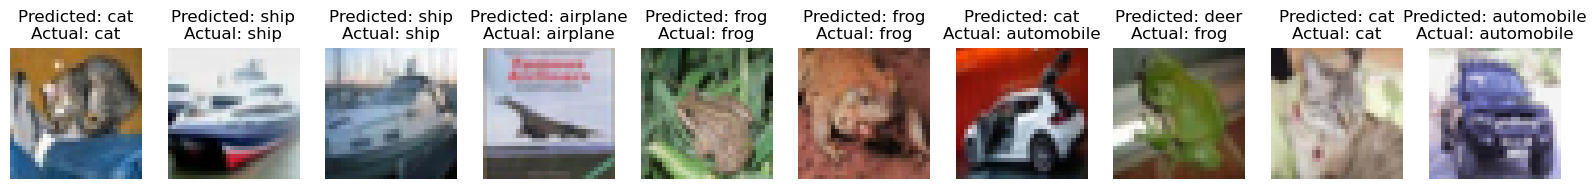

In [16]:
# Plot the predictions and original labels

import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

predictions = model3.predict(x_test)
predictions = np.argmax(predictions, axis=1)

fig, axes = plt.subplots(1, 10, figsize=(20, 20))
for i in range(10):
	axes[i].imshow(x_test[i])
	axes[i].set_title(f"Predicted: {class_names[predictions[i]]}\nActual: {class_names[np.argmax(y_test[i])]}")
	axes[i].axis('off')

plt.show()